# Problem Statement
Ebuss is a e-commerce company which has captured a huge market share in many fields. It sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

Objective is to build a model that will improve the recommendations given to the users given their past reviews and ratings. For this, we will analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

Plan is to build a sentiment-based product recommendation system, which includes the following tasks.
* Data sourcing and sentiment analysis
* Building a recommendation system
* Improving the recommendations using the sentiment analysis model
* Deploying the end-to-end project with a user interface

### Data sourcing and sentiment analysis
In this task, we will analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 
This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. 

#### The steps to be performed for the first task are:

* Exploratory data analysis

* Data cleaning

* Text preprocessing

* Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.

* Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
    1. Logistic regression
    2. Random forest
    3. XGBoost
    4. Naive Bayes

Out of these four models, you need to select one classification model based on its performance.

### Building a recommendation system
We will be analyzing the following two recommendation systems:

    1. User-based recommendation system
    2. Item-based recommendation system

And select the one that is best suited in this case. 

 

Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. You can use the 'reviews_username' (one of the columns in the dataset) to identify your user. 

 

### Improving the recommendations using the sentiment analysis model
Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews.

In this way, you will get an ML model (for sentiments) and the best-suited recommendation system. Next, you need to deploy the entire project publically.

 

### Deployment of this end to end project with a user interface
Once you get the ML model and the best-suited recommendation system, you will deploy the end-to-end project. You need to use the Flask framework, which is majorly used to create web applications to deploy machine learning models.

To make the web application public, you need to use Heroku, which works as the platform as a service (PaaS) that helps developers build, run and operate applications entirely on the cloud.

Next, you need to include the following features in the user interface.

Take any of the existing usernames as input.
Create a submit button to submit the username.
Once you press the submit button, it should recommend 5 products based on the entered username.
Note: An important point that you need to consider here is that the number of users and the number of products are fixed in this case study, and you are doing the sentiment analysis and building the recommendation system only for those users who have already submitted the reviews or ratings corresponding to some of the products in the dataset. 

 

Because the dataset that you are going to use is huge, the model training may take time, and hence, you can use Google Colab to directly code or upload the already created notebook.

 

You can look into the user guide to access the Colab below.


### Assumption: No new users or products will be introduced or considered when building or predicting from the models built.


# Data sourcing and sentiment analysis
In this task, we will analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 
This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. 

In [1]:
# importing necessary library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import spacy
import string
import os, sys
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#from google.colab import drive

import warnings

In [2]:
# mount google drive
#drive.mount('/content/gdrive')

In [3]:
# reading csv data file
review= pd.read_csv("sample30.csv")
#review= pd.read_csv("/content/gdrive/MyDrive/CapstoneProject/sample30.csv")

In [4]:
# looking at sample data
review.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [5]:
# checking the dataset shape(size)
review.shape

(30000, 15)

In [6]:
# checking the metadata of the dataset
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

#### Metadata Information
Attribute: Attribute Description

id: Uniques identity number to identify each unique review given by the user to a particular product in the dataset

brand: Name of the brand of the product to which user has given review and rating

categories: Category of the product like household essentials, books, personal care products, medicines, cosmetic†items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.

manufacturer: Name of the manufacturer of the product

name: Name of the product to which user has added review or rating

reviews_date: Date on which the review has been added by the user

reviews_didPurchase: Whether a particular user has purchased the product or not

reviews_doRecommend: Whether a particular user has recommended the product or not

reviews_rating: Rating given by the user to a particular product

reviews_text: Review given by the user to a particular product

reviews_title: The title of the review given by the user to a particular product

reviews_userCity: The residing city of the user

reviews_userProvince: The residing province of the user

reviews_username: The unique identification for individual user in the dataset

user_sentiment: The overall sentiment of the user for a particular product (Positive or Negative)!


### Exploratory Data Analysis

In [7]:
# checking for missing values
review.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
# checking for % of missing values
round(100*(review.isnull().sum()/len(review.index)), 2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

#### Data Cleaning

**reviews_userProvinceare and reviews_userCity** are both geo location data with over 90% missing values and there is no other geo location data to impute them; lets drop them from our analysis

In [9]:
# Dropping reviews_userProvince and reviews_userCity

review=review.drop(["reviews_userCity","reviews_userProvince"],axis=1)

In [10]:
# reviews_didPurchase (Whether a particular user has purchased the product or not) has 46% missing values
# checking value_counts to see if the remaining data is useful for analysis

review["reviews_didPurchase"].value_counts()

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

In [11]:
# reviews_didPurchase has less than 5% records related to purchase the product
# With 48% values as False and 47% missing values; this data is not usefull for analysis and hard to impute
# Dropping reviews_didPurchase from analysis

review=review.drop(["reviews_didPurchase"],axis=1)

In [12]:
# reviews_doRecommend (Whether a particular user has recommended the product or not) has 8.5% missing values
# checking value_counts()

review["reviews_doRecommend"].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

**reviews_doRecommend** is highly skewed towards True. We may be able to impute it with reviews_rating


Lets first explore: reviews_rating

In [13]:
# reviews_rating (Rating given by the user to a particular product) is a numberic column
# lets check descriptive statistics for reviews_rating 

review["reviews_rating"].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

The average rating for all products reviewed is **4.8**

In [14]:
# checking for value_counts of reviews_rating
review["reviews_rating"].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

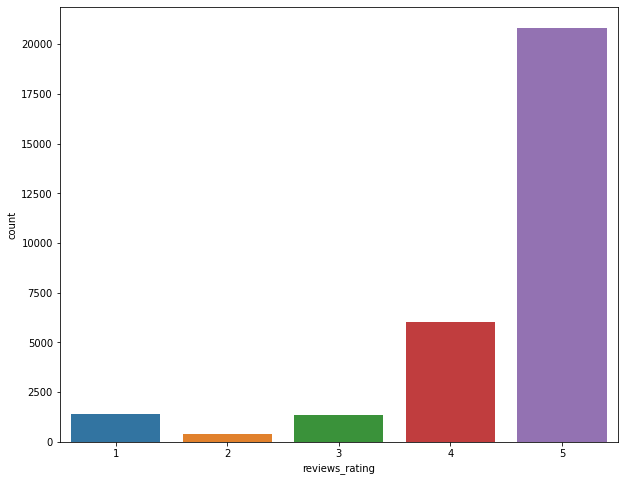

In [15]:
# visualizing distribution of reviews_rating through barchart
plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', data=review)

**90%** of reviews have a rating of  **4 & 5** indicating high data imbalance towards high ratings

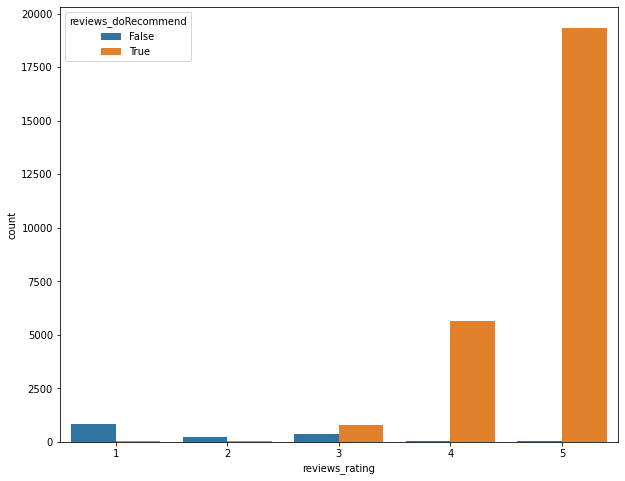

In [16]:
# Lets now compare reviews_doRecommend with reviews_rating

plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', hue="reviews_doRecommend", data=review)

The distribution of reviews_doRecommend is highly aligned with reviews_rating. We can impute missing values in reviews_doRecommend with reviews_rating by apply the logic : 3, 4 & 5 as Positive and 1 and 2 as Negative

In [17]:
review.reviews_doRecommend.loc[review["reviews_doRecommend"].isnull()]=review['reviews_rating'].apply(lambda x: True if x >=3 else False)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
# checking the value_counts of reviews_doRecommend
review["reviews_doRecommend"].value_counts()

True     27826
False     2174
Name: reviews_doRecommend, dtype: int64

In [19]:
# user_sentiment (The overall sentiment of the user for a particular product (Positive or Negative)! 
# has only 1 missiing value, lets check the value_counts

review["user_sentiment"].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [20]:
# lets look at the row level data with missing user_sentiment

review[review["user_sentiment"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [21]:
# This record has reviews_rating = 5 with reviews_doRecommend = True; we can impute missing value as 'Positive'
# therefore replacing the null values as Positive

review["user_sentiment"] = review["user_sentiment"].fillna('Positive')

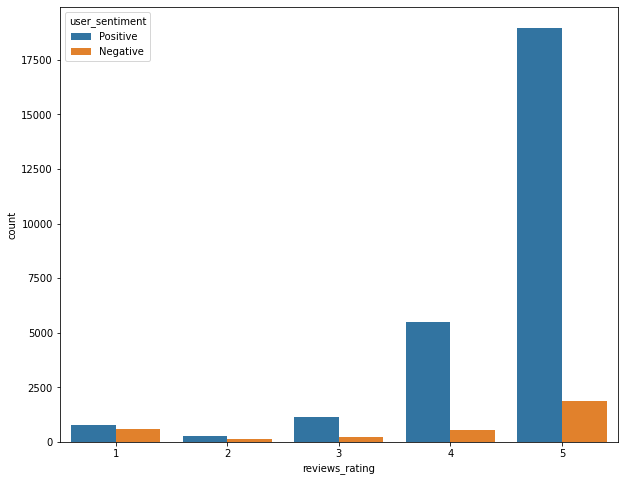

In [22]:
# Lets compare user_sentiment with reviews_rating

plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_rating', hue="user_sentiment", data=review)

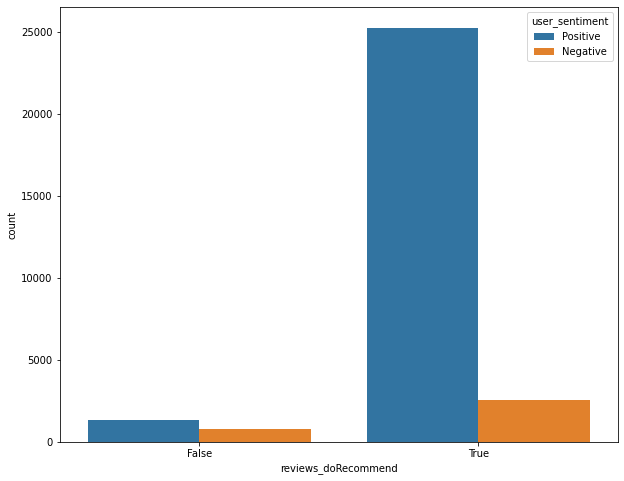

In [23]:
# Lets compare user_sentiment with reviews_doRecommend

plt.figure(figsize=(10,8))
ax = sns.countplot(x='reviews_doRecommend', hue="user_sentiment", data=review)

The distribution of user_sentiment is not accurately aligned with reviews_rating and reviews_doRecommend

There are more Positive user_sentiment appearing in reviews_rating of 1 than negative sentiments; and reviews_rating of 4 and 5 has more than anticiipated number of Negative user_sentiment. Also, we see a many negative sentiments associated with products user has recommended 

The distribution of user_sentiment is not consitant with the domain assumption related to reviews; indicating incorrect classifications of user sentiments. 

user_sentiment is not usefult for our analysis

In [24]:
# manufacturer column has only 141 (0.5%) missing values
# lets check for unique values

review["manufacturer"].nunique()

227

In [25]:
# lets check the missing data rows
review[review["manufacturer"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
22210,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-03-05T00:00:00.000Z,False,1,I have read the entire Alex Cross series and I...,Disappointing casting,poorcrossing,Negative
22211,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2013-10-11T00:00:00.000Z,False,1,Idris Elba was originally cast in the lead rol...,Atrocious casting,naberios,Positive
22212,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2017-06-11T00:00:00.000Z,False,2,I was way more excited or this movie than I sh...,Meh,jz30,Positive
22213,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2014-12-27T00:00:00.000Z,False,2,I'm a huge fan of James Patterson and although...,Disappointing Movie,david,Positive
22214,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2015-12-26T20:30:31.000Z,True,3,"not as exciting as the book, but very good",Alex Cross Dvd,bobc,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
22346,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2015-09-26T00:00:00.000Z,True,5,"Alex Cross the movie, was astoundingly outstan...",Wonderful Movie,constable6,Positive
22347,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2016-01-08T00:00:00.000Z,True,5,I had no clue that this movie would be this en...,Tyler Perry,tjones,Positive
22348,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2016-01-07T00:00:00.000Z,True,5,Must see action! Great acting and great movie ...,Thriller,hmalave29,Positive
22349,AVpfOIrkilAPnD_xXgDG,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,In...",NaN,Alex Cross (dvdvideo),2016-01-06T00:00:00.000Z,True,5,"My mom and I are big fans of the books. So, I ...",Alex Cross Fans Will Not Be Disappointed,ocgirlie007,Positive


In [26]:
# manufacturer and brands are often associated
# lets check the value_counts of brand for the missing data rows

review[review["manufacturer"].isnull()].brand.value_counts()

Summit Entertainment    141
Name: brand, dtype: int64

In [27]:
# 'Summit Entertainment' is the brand associated with all the Missing Values
# lets check the value_counts of manufacturer for brand 'Summit Entertainment'
review[review["brand"]=='Summit Entertainment'].manufacturer.value_counts()

Summit Entertainment    672
Name: manufacturer, dtype: int64

In [28]:
# since 'Summit Entertainment' is both the manufacturer and brand we can impute missing values of manufacturer name as 'Summit Entertainment'

review["manufacturer"] = review["manufacturer"].fillna('Summit Entertainment')

In [29]:
# reviews_title(The title of the review given by the user to a particular product) has 190 missing values
# lets check the missing data rows

review[review["reviews_title"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
1239,AV1YneDPglJLPUi8IJyQ,Finish,"Household Essentials,Cleaning Supplies,Dish De...",Reckitt Benckiser,"Finish Quantum Dishwasher Detergent, Lemon Spa...",2017-11-16T08:12:30.000Z,True,5,Great quality and a great price,NaN,queen 79,Positive
1441,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,True,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive
1442,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2015-02-09T00:00:00Z,True,3,I have thick coarse hair and for me this just ...,NaN,lisa,Negative
1443,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2013-11-07T00:00:00Z,True,3,Wanted to love this but it's a bit too heavy f...,NaN,julie,Positive
1444,AVpe_dxlilAPnD_xSiHI,The Seaweed Bath Co.,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",The Seaweed Bath,"The Seaweed Bath Co. Argan Conditioner, Smooth...",2017-11-27T18:18:38.000Z,True,4,I actually really enjoy this conditioner. Have...,NaN,aland,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
28790,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-02-28T00:00:00Z,True,5,I have fine hair and don't like heavy hairspra...,NaN,linny,Positive
28791,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-09-04T00:00:00Z,True,5,I tried this product for the first time im ver...,NaN,marcos,Positive
28792,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2015-04-17T00:00:00Z,True,5,I am an African American woman who has been na...,NaN,natural1,Positive
28793,AVpfvieo1cnluZ0-qdnu,L'Oreal Paris,"Personal Care,Hair Care,Styling Gel/Lotion,Bea...",Generic,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,2014-06-24T00:00:00Z,True,5,works great! Actually holds my hard-to-hold-in...,NaN,henry,Positive


In [30]:
# comparing samples of reviews_title and reviews_text(Review given by the user to a particular product)

review[["reviews_title", "reviews_text"]].head(20)

,reviews_title,reviews_text
0,Just Awesome,i love this album. it's very good. more to the...
1,Good,Good flavor. This review was collected as part...
2,Good,Good flavor.
3,Disappointed,I read through the reviews on here before look...
4,Irritation,My husband bought this gel for us. The gel cau...
5,Not worth it,My boyfriend and I bought this to spice things...
6,Disappointing,Bought this earlier today and was excited to c...
7,Not happy at all,I bought this product for my husband and I to ...
8,Very disappointing,My husband and I bought this for some extra fu...
9,Don't buy,Got as a surprise for my husband there is noth...


Since reviews_title and reviews_text are user provided inputs lets combine reviews_title with reviews_text

In [31]:
# convering reviews_title to string object
review["reviews_title"]=review["reviews_title"].astype('str')

In [32]:
# convering reviews_title to string object
review["reviews_text"]=review["reviews_text"].astype('str')

In [33]:
# combine reviews_title with reviews_text
review["reviews_text"] = review["reviews_title"].str.cat(review["reviews_text"], sep =" ")

In [34]:
# checking sample data of reviews_title and updated reviews_text

review[["reviews_title", "reviews_text"]].head(20)

,reviews_title,reviews_text
0,Just Awesome,Just Awesome i love this album. it's very good...
1,Good,Good Good flavor. This review was collected as...
2,Good,Good Good flavor.
3,Disappointed,Disappointed I read through the reviews on her...
4,Irritation,Irritation My husband bought this gel for us. ...
5,Not worth it,Not worth it My boyfriend and I bought this to...
6,Disappointing,Disappointing Bought this earlier today and wa...
7,Not happy at all,Not happy at all I bought this product for my ...
8,Very disappointing,Very disappointing My husband and I bought thi...
9,Don't buy,Don't buy Got as a surprise for my husband the...


In [35]:
# dropping reviews_title

review=review.drop(["reviews_title"],axis=1)

In [36]:
# reviews_username (The unique identification for individual user in the dataset) has 63 missiing values
# lets check the missing data rows

review[review["reviews_username"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment
1453,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-07-08T00:00:00Z,True,4,Way Basics 3-Shelf Storage Unit in Espresso Wo...,NaN,Positive
1531,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2011-10-30T05:00:00Z,True,5,Wonderful I'm very sensitive to fragrance - mo...,NaN,Positive
1532,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2013-07-19T05:00:00Z,True,5,Smell stays on your skin Not all shower gels l...,NaN,Positive
1787,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,False,2,Purely for Elvis fans... Not one of Elvis's be...,NaN,Positive
1792,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,True,4,"If you like EP, you'll love this one Like ever...",NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...
26489,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-06-11T00:00:00Z,False,1,Wouldn't recommend for babies with sensitive s...,NaN,Positive
26497,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-06-15T00:00:00Z,False,1,Did not work at all. My daughter has really se...,NaN,Positive
26619,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2015-03-12T03:15:19.000Z,True,5,Solved A Long Term Problem For Me! This is the...,NaN,Positive
26633,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-01-11T00:00:00Z,True,5,Good all over and all-day protection. This goe...,NaN,Positive


In [37]:
# checking no. of unique values
review['reviews_username'].nunique()

24914

In [38]:
# Since reviews_username is unique to users it cannot be imputed with the given data
# Also this column is needed for user-user based recommendation, but missing values have to be dealth with first
# We can impute the missiing reviews_username as unknown for now; but might need to drop the 63 rows that were imputed later.

#review = review[review['reviews_username'].notna()]
# since 'Summit Entertainment' is both the manufacturer and brand we can impute missing values of manufacturer name as 'Summit Entertainment'

review["reviews_username"] = review["reviews_username"].fillna('Unknown')

In [39]:
# checking for data
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  30000 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_username     30000 non-null  object
 10  user_sentiment       30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [40]:
# checking unique values of reviews_date
review['reviews_date'].nunique()

6857

In [41]:
review['reviews_date'].head(10)

0    2012-11-30T06:21:45.000Z
1    2017-07-09T00:00:00.000Z
2    2017-07-09T00:00:00.000Z
3    2016-01-06T00:00:00.000Z
4    2016-12-21T00:00:00.000Z
5    2016-04-20T00:00:00.000Z
6    2016-02-08T00:00:00.000Z
7    2016-02-21T00:00:00.000Z
8    2016-03-28T00:00:00.000Z
9    2016-03-21T00:00:00.000Z
Name: reviews_date, dtype: object

In [42]:
review["reviews_date1"] = review["reviews_date"].str[:10]



In [43]:
review["reviews_date1"].head(10)

0    2012-11-30
1    2017-07-09
2    2017-07-09
3    2016-01-06
4    2016-12-21
5    2016-04-20
6    2016-02-08
7    2016-02-21
8    2016-03-28
9    2016-03-21
Name: reviews_date1, dtype: object

In [44]:
review["reviews_date1"].value_counts()

2012-01-26    1256
2014-12-03     681
2014-12-05     421
2014-12-04     411
2014-09-19     406
              ... 
2010-10-01       1
2010-09-11       1
2011-02-05       1
2010-11-21       1
2010-05-31       1
Name: reviews_date1, Length: 2624, dtype: int64

In [45]:
# Since we are not analyzing data based on time. lets drop reviews_date

#review=review.drop(["reviews_date"],axis=1)

In [46]:
# checking unique values of id (Uniques identity number to identify each unique review given by the user to a particular product in the dataset)
review['id'].nunique()

271

In [47]:
# checking reviews_rating count by id
review.groupby('id')['reviews_rating'].count().sort_values(ascending=False).head(20)

id
AVpf3VOfilAPnD_xjpun    8545
AVpfPaoqLJeJML435Xk9    3325
AVpfJP1C1cnluZ0-e3Xy    2039
AVpfW8y_LJeJML437ySW    1186
AVpfRTh1ilAPnD_xYic2    1143
AVpf63aJLJeJML43F__Q     873
AVpf0eb2LJeJML43EVSt     845
AVpe41TqilAPnD_xQH3d     757
AVpfm8yiLJeJML43AYyu     693
AVpf2tw1ilAPnD_xjflC     672
AVpe59io1cnluZ0-ZgDU     668
AV1l8zRZvKc47QAVhnAv     634
AVpf9pzn1cnluZ0-uNTM     412
AVpfOmKwLJeJML435GM7     372
AVpe9W4D1cnluZ0-avf0     362
AV1YGDqsGV-KLJ3adc-O     348
AVpfPPkEilAPnD_xX3cP     313
AVpf4oLxLJeJML43FcxC     313
AVpe8gsILJeJML43y6Ed     310
AVpfM_ytilAPnD_xXIJb     264
Name: reviews_rating, dtype: int64

<AxesSubplot:xlabel='id'>

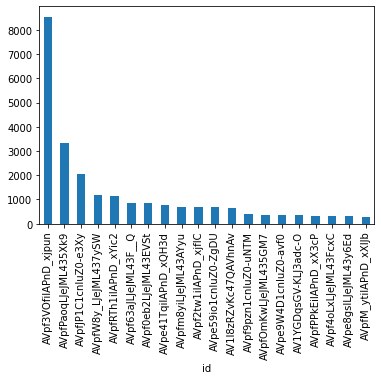

In [48]:
review.groupby('id')['reviews_rating'].count().sort_values(ascending=False).head(20).plot(kind= "bar")

In [49]:
# looking at distribution of reviews_rating for the top product id
review.loc[review['id']=='AVpf3VOfilAPnD_xjpun'].groupby('reviews_rating')['id'].count()

reviews_rating
1      16
2      11
3      71
4    1295
5    7152
Name: id, dtype: int64

In [50]:
# checking unique values of name (Name of the product to which user has added review or rating)
review['name'].nunique()

271

In [51]:
# checking reviews_rating count by name
review.groupby('name')['reviews_rating'].count().sort_values(ascending=False).head(20)

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                        8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  3325
Clorox Disinfecting Bathroom Cleaner                                                             2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                   1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              1143
Burt's Bees Lip Shimmer, Raisin                                                                   873
The Resident Evil Collection 5 Discs (blu-Ray)                                                    845
Mike Dave Need Wedding Dates (dvd + Digital)                                                      757
Nexxus Exxtra Gel Style Creation Sculptor                                                         693
Red (special Edition) (dvdvideo)                                             

In [52]:
# checking unique values of brand (Name of the brand of the product to which user has given review and rating)
review['brand'].nunique()

214

In [53]:
# checking reviews_rating count by brand
review.groupby('brand')['reviews_rating'].count().sort_values(ascending=False).head(10)

brand
Clorox                  10585
Warner Home Video        3325
Disney                   1200
L'oreal Paris            1186
FOX                       887
Burt's Bees               881
Sony Pictures             845
Summit Entertainment      813
Nexxus                    693
Universal Home Video      668
Name: reviews_rating, dtype: int64

<AxesSubplot:xlabel='brand'>

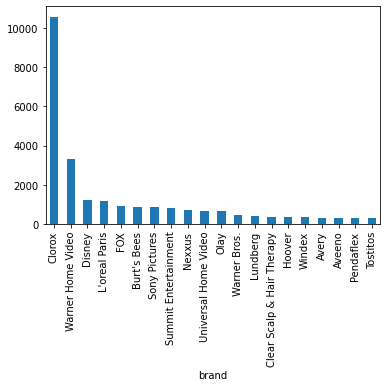

In [54]:
review.groupby('brand')['reviews_rating'].count().sort_values(ascending=False).head(20).plot(kind= "bar")

In [55]:
# looking at distribution of reviews_rating for the top brand
review.loc[review['brand']=='Clorox'].groupby('reviews_rating')['id'].count()

reviews_rating
1      29
2      12
3      87
4    1534
5    8923
Name: id, dtype: int64

Highly positive reviews for Clorox

In [56]:
# looking at mean reviews_rating for the top brand
review.loc[review['brand']=='Clorox'].reviews_rating.mean()

4.824279641001417

In [57]:
review.groupby('brand')['reviews_rating'].mean().sort_values(ascending=False).head(50)

brand
4C Foods                          5.000000
Hunter Fan                        5.000000
Naturtint                         5.000000
La Tortilla Factory               5.000000
Jake And The Neverland Pirates    5.000000
JNH Lifestyles                    5.000000
J.R. Watkins                      5.000000
INC International Concepts        5.000000
Hortense B. Hewitt                5.000000
Pacific Natural Foods             5.000000
Heinz                             5.000000
Happy Family                      5.000000
Guardian                          5.000000
Fiskars                           5.000000
Every Man Jack                    5.000000
Dermalogica                       5.000000
Noosa                             5.000000
Pinaud                            5.000000
Carson-Dellosa Publishing         5.000000
Tim Holtz                         5.000000
Wilton                            5.000000
Walkers                           5.000000
Voortman                          5.000000
Unive

In [58]:
# checking unique values of categories (Category of the product like household essentials, books, personal care products, medicines, cosmetic†items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.)
review['categories'].nunique()

270

In [59]:
# checking reviews_rating count by categories
review.groupby('categories')['reviews_rating'].count().sort_values(ascending=False).head(20)

categories
Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Clean

In [60]:
# Dropping categories data as it is not easy to use for our analysis

# review=review.drop(["categories"],axis=1)

In [61]:
# checking unique values of reviews_username (The unique identification for individual user in the dataset)
review['reviews_username'].nunique()

24915

In [62]:
# checking reviews_rating count by reviews_username
review.groupby('reviews_username')['reviews_rating'].count().sort_values(ascending=False).head(20)

reviews_username
Unknown              63
byamazon customer    41
mike                 41
chris                32
lisa                 16
sandy                15
rick                 15
tony                 15
dave                 14
john                 14
jojo                 13
james                13
linda                12
matt                 12
movielover           12
donna                11
scott                11
laura                11
mark                 11
cindy                11
Name: reviews_rating, dtype: int64

The 63 imputed missing values for reviews_username as "Unknown" is the highest; this could create problems when performing user-user recommendation

In [63]:
# looking at distribution of reviews_rating for the top reviews_username
review.loc[review['reviews_username']=='byamazon customer'].groupby('reviews_rating')['id'].count()

reviews_rating
1     9
2     1
4     4
5    27
Name: id, dtype: int64

Similar to "Unknown", reviews_username = "byamazon customer" is appears to be a generic name and not an individual user; this is to be handled when performing user-user recommendation

In [64]:
# looking at distribution of reviews_rating for the top reviews_username
review.loc[review['reviews_username']=='mike'].groupby('reviews_rating')['id'].count()

reviews_rating
1     2
3     3
4    10
5    26
Name: id, dtype: int64

<AxesSubplot:xlabel='reviews_username'>

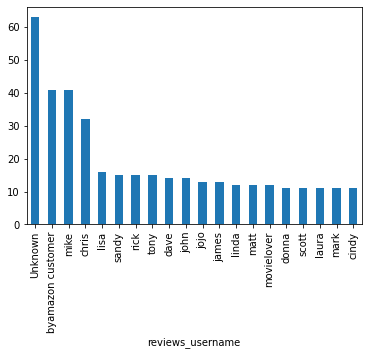

In [65]:
review.groupby('reviews_username')['reviews_rating'].count().sort_values(ascending=False).head(20).plot(kind= "bar")

In [66]:
# checking reviews_rating count by reviews_username
review.groupby('reviews_username')['reviews_rating'].mean().sort_values(ascending=False).head(20)

reviews_username
keysha            5.0
shawon888         5.0
shawnna71         5.0
shawnp            5.0
keeneramanda      5.0
keeks_ruggiero    5.0
keekee            5.0
keebler76         5.0
kee76             5.0
keesh             5.0
keaukanaii        5.0
shay              5.0
shay04            5.0
kdub77            5.0
kdub              5.0
kdo259            5.0
keepisr           5.0
keet              5.0
shay78240         5.0
keisha1978        5.0
Name: reviews_rating, dtype: float64

In [67]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  30000 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_username     30000 non-null  object
 10  user_sentiment       30000 non-null  object
 11  reviews_date1        29954 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


## Text preprocessing

For Sentiment Analysis Model we mainly need reviews_text & reviews_rating 

In [68]:
# create new dataframe with reviews_text and reviews_rating only
sentiment_df= review[['reviews_text','reviews_rating']]

As we are going to performing a binary calssification on sentiments i.e. Positive or Negative;
Lets use reviews_rating to create the classification based on logic that reviews_rating 3 and above are considered 'Positive' and reviews_rating below 3 are considered 'Negatiive'. This was also apparent when we looked at reviews_doRecommend and our domain understanding also makes the same assumptions for ratings data

In [69]:
# creating a derrived metric sentiment based on reviews_rating
sentiment_df['sentiment']=sentiment_df['reviews_rating'].apply(lambda x: 1 if x >=3 else 0)

<ipython-input-69-f97053b2d2a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment']=sentiment_df['reviews_rating'].apply(lambda x: 1 if x >=3 else 0)


In [70]:
sentiment_df.head(10)

,reviews_text,reviews_rating,sentiment
0,Just Awesome i love this album. it's very good...,5,1
1,Good Good flavor. This review was collected as...,5,1
2,Good Good flavor.,5,1
3,Disappointed I read through the reviews on her...,1,0
4,Irritation My husband bought this gel for us. ...,1,0
5,Not worth it My boyfriend and I bought this to...,1,0
6,Disappointing Bought this earlier today and wa...,1,0
7,Not happy at all I bought this product for my ...,1,0
8,Very disappointing My husband and I bought thi...,1,0
9,Don't buy Got as a surprise for my husband the...,1,0


In [71]:
sentiment_df["sentiment"].value_counts()

1    28196
0     1804
Name: sentiment, dtype: int64

In [72]:
# dropping reviews_rating
sentiment_df=sentiment_df.drop(["reviews_rating"],axis=1)

Steps for text preprocessing/cleaning for sentiment analysus
* Converting to lower case for uniformity
* Removing punctuation and special characters
* Removing stop words
* Lemmitization
* TF-IDF vectorization
* Word vectorization

In [73]:
# converting to lower case
sentiment_df["reviews_text"] = sentiment_df["reviews_text"].str.lower()
sentiment_df.head(20)

,reviews_text,sentiment
0,just awesome i love this album. it's very good...,1
1,good good flavor. this review was collected as...,1
2,good good flavor.,1
3,disappointed i read through the reviews on her...,0
4,irritation my husband bought this gel for us. ...,0
5,not worth it my boyfriend and i bought this to...,0
6,disappointing bought this earlier today and wa...,0
7,not happy at all i bought this product for my ...,0
8,very disappointing my husband and i bought thi...,0
9,don't buy got as a surprise for my husband the...,0


In [74]:
# creating function to removing punctuation 
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

sentiment_df["reviews_text"] = sentiment_df["reviews_text"].apply(lambda text: remove_punctuation(text))
sentiment_df.head(10)

,reviews_text,sentiment
0,just awesome i love this album its very good m...,1
1,good good flavor this review was collected as ...,1
2,good good flavor,1
3,disappointed i read through the reviews on her...,0
4,irritation my husband bought this gel for us t...,0
5,not worth it my boyfriend and i bought this to...,0
6,disappointing bought this earlier today and wa...,0
7,not happy at all i bought this product for my ...,0
8,very disappointing my husband and i bought thi...,0
9,dont buy got as a surprise for my husband ther...,0


In [75]:
# creating function to remove english stopwords 
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
   
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

sentiment_df["reviews_text"] = sentiment_df["reviews_text"].apply(lambda text: remove_stopwords(text))
#sentiment_df["reviews_text"] = sentiment_df["reviews_text"].apply(lambda text: remove_stopwords("review"))
sentiment_df.head(10)

,reviews_text,sentiment
0,awesome love album good hip hop side current p...,1
1,good good flavor review collected part promotion,1
2,good good flavor,1
3,disappointed read reviews looking buying one c...,0
4,irritation husband bought gel us gel caused ir...,0
5,worth boyfriend bought spice things bedroom hi...,0
6,disappointing bought earlier today excited che...,0
7,happy bought product husband try impressed tin...,0
8,disappointing husband bought extra fun werevbo...,0
9,dont buy got surprise husband nothing special ...,0


In [76]:
# checking the bag of words for most frequesntly occuring words
from collections import Counter
cnt = Counter()
for text in sentiment_df["reviews_text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(30)

[('great', 14968),
 ('love', 11274),
 ('product', 10817),
 ('movie', 9401),
 ('review', 9236),
 ('part', 9065),
 ('promotion', 8747),
 ('collected', 8745),
 ('use', 8529),
 ('wipes', 6913),
 ('good', 6744),
 ('clorox', 6019),
 ('clean', 5543),
 ('hair', 4873),
 ('like', 4664),
 ('easy', 3945),
 ('one', 3798),
 ('best', 3023),
 ('really', 2950),
 ('godzilla', 2739),
 ('smell', 2704),
 ('using', 2607),
 ('would', 2604),
 ('well', 2467),
 ('cleaning', 2444),
 ('used', 2424),
 ('time', 2401),
 ('new', 2105),
 ('back', 2068),
 ('get', 2046)]

##### Lemmitization

In [77]:
import nltk
nltk.download('averaged_perceptron_tagger')
    
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

sentiment_df["reviews_text"] = sentiment_df["reviews_text"].apply(lambda text: lemmatize_words(text))
sentiment_df.head(20)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/z062960/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews_text,sentiment
0,awesome love album good hip hop side current p...,1
1,good good flavor review collect part promotion,1
2,good good flavor,1
3,disappoint read review look buy one couple lub...,0
4,irritation husband buy gel u gel caused irrita...,0
5,worth boyfriend bought spice thing bedroom hig...,0
6,disappoint buy earlier today excite check base...,0
7,happy buy product husband try impress tingle w...,0
8,disappointing husband buy extra fun werevboth ...,0
9,dont buy get surprise husband nothing special ...,0


##### TF-IDF vectorization

In [78]:
# TF-IDF vectorization using snowball stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

import os
#create a stemmer calling the class Snowball Stemmer
stemmer = SnowballStemmer("english")

def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

#define our own tokenizing function that we will pass into the TFIDFVectorizer. 
#We will also stem the words here.

if os.path.exists('features.pickle'):
    print('Pickled file alredy present, loading....')
    features = pickle.load(open("features.pickle", "rb"))
    print('Pickle file loaded.')
else:
    #define the vectorizer
    vectorizer = TfidfVectorizer(tokenizer = tokens, 
                                 stop_words = 'english', ngram_range=(1,1), min_df = 0.1)
    #fit the vectorizers to the data.
    features = vectorizer.fit_transform(sentiment_df['reviews_text'])
(features)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<30000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 111222 stored elements in Compressed Sparse Row format>

In [79]:
# fitting the vectorizer to get features
features = vectorizer.fit_transform(sentiment_df['reviews_text'])
(features)

<30000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 111222 stored elements in Compressed Sparse Row format>

In [80]:
sentiment_df

,reviews_text,sentiment
0,awesome love album good hip hop side current p...,1
1,good good flavor review collect part promotion,1
2,good good flavor,1
3,disappoint read review look buy one couple lub...,0
4,irritation husband buy gel u gel caused irrita...,0
...,...,...
29995,softness get conditioner influenster try im lo...,1
29996,love love receive review purpose influenster l...,1
29997,hair smooth use first love smell product wash ...,1
29998,perfect oily hair receive influenster never go...,1


##### Visualizing text data with word cloud 

In [81]:
!pip install wordcloud

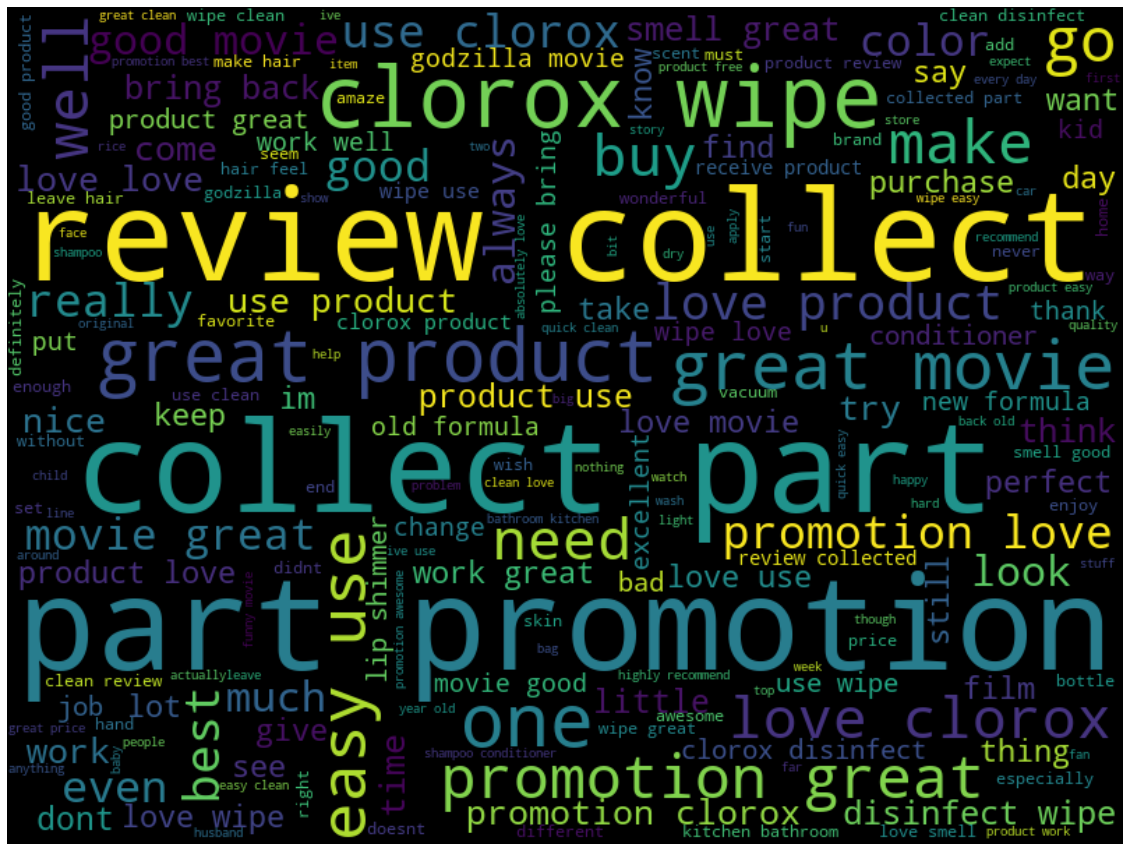

In [82]:
#let's form the word cloud of sentiments
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes
all_words = ' '.join([text for text in sentiment_df['reviews_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



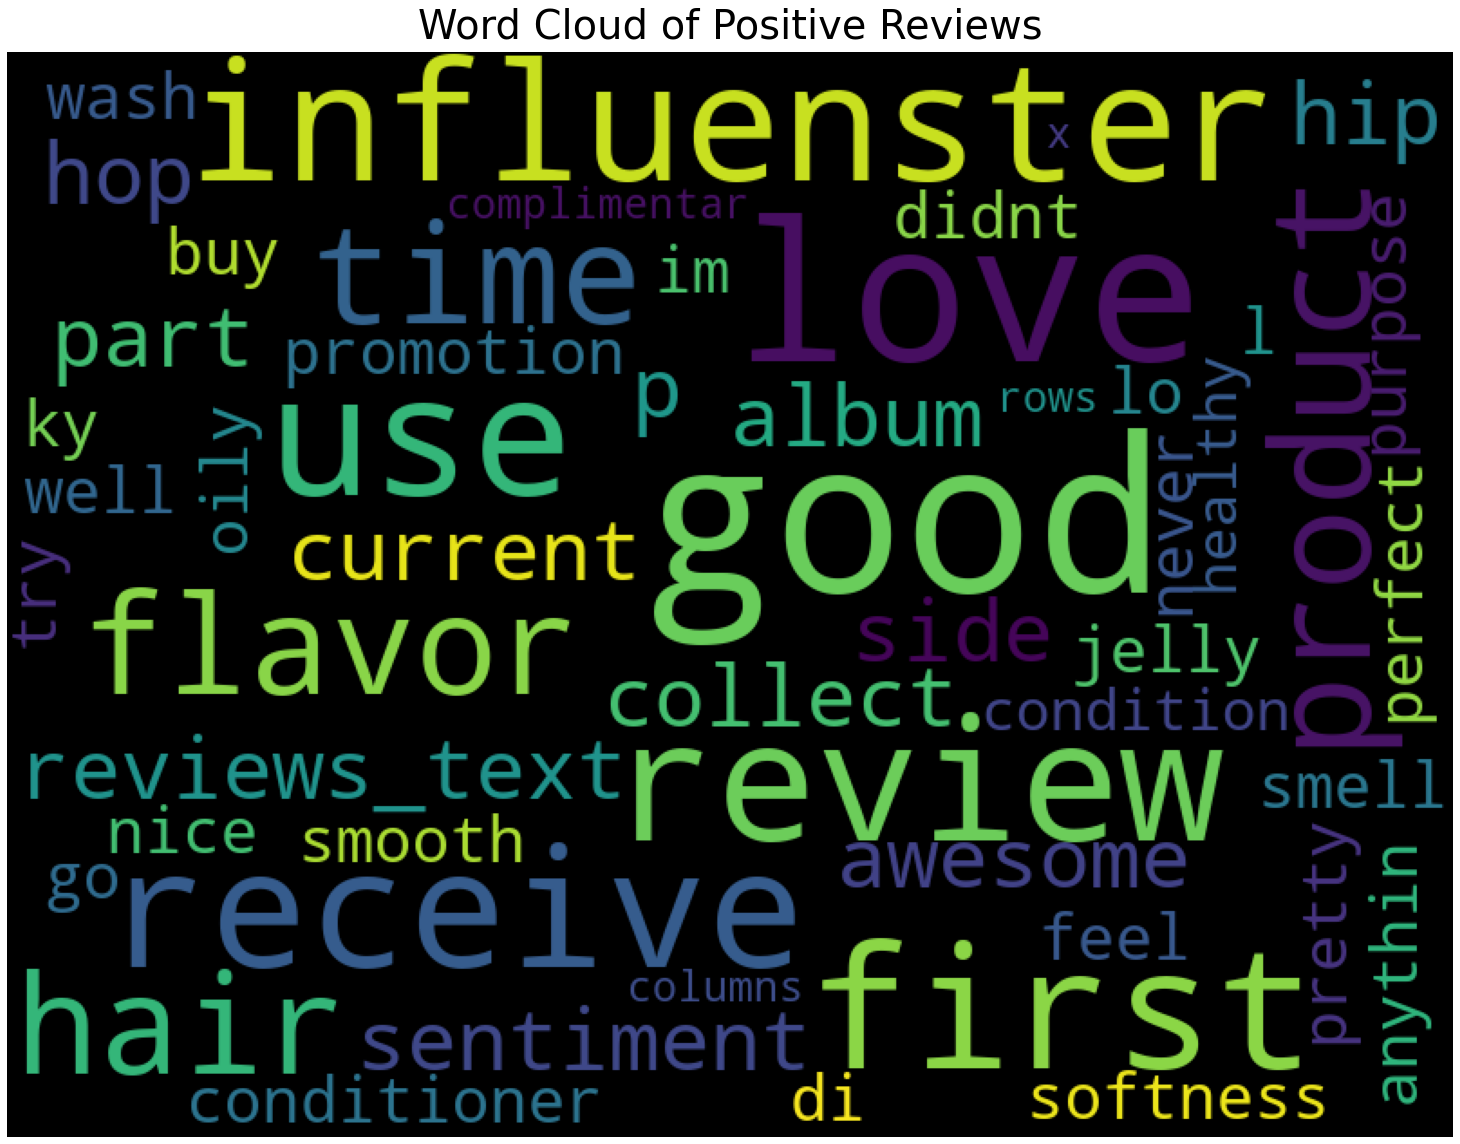

In [83]:
# to see the positive reviews wordcloud
wordcloud.generate(str(sentiment_df.loc[sentiment_df['sentiment']==1]))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

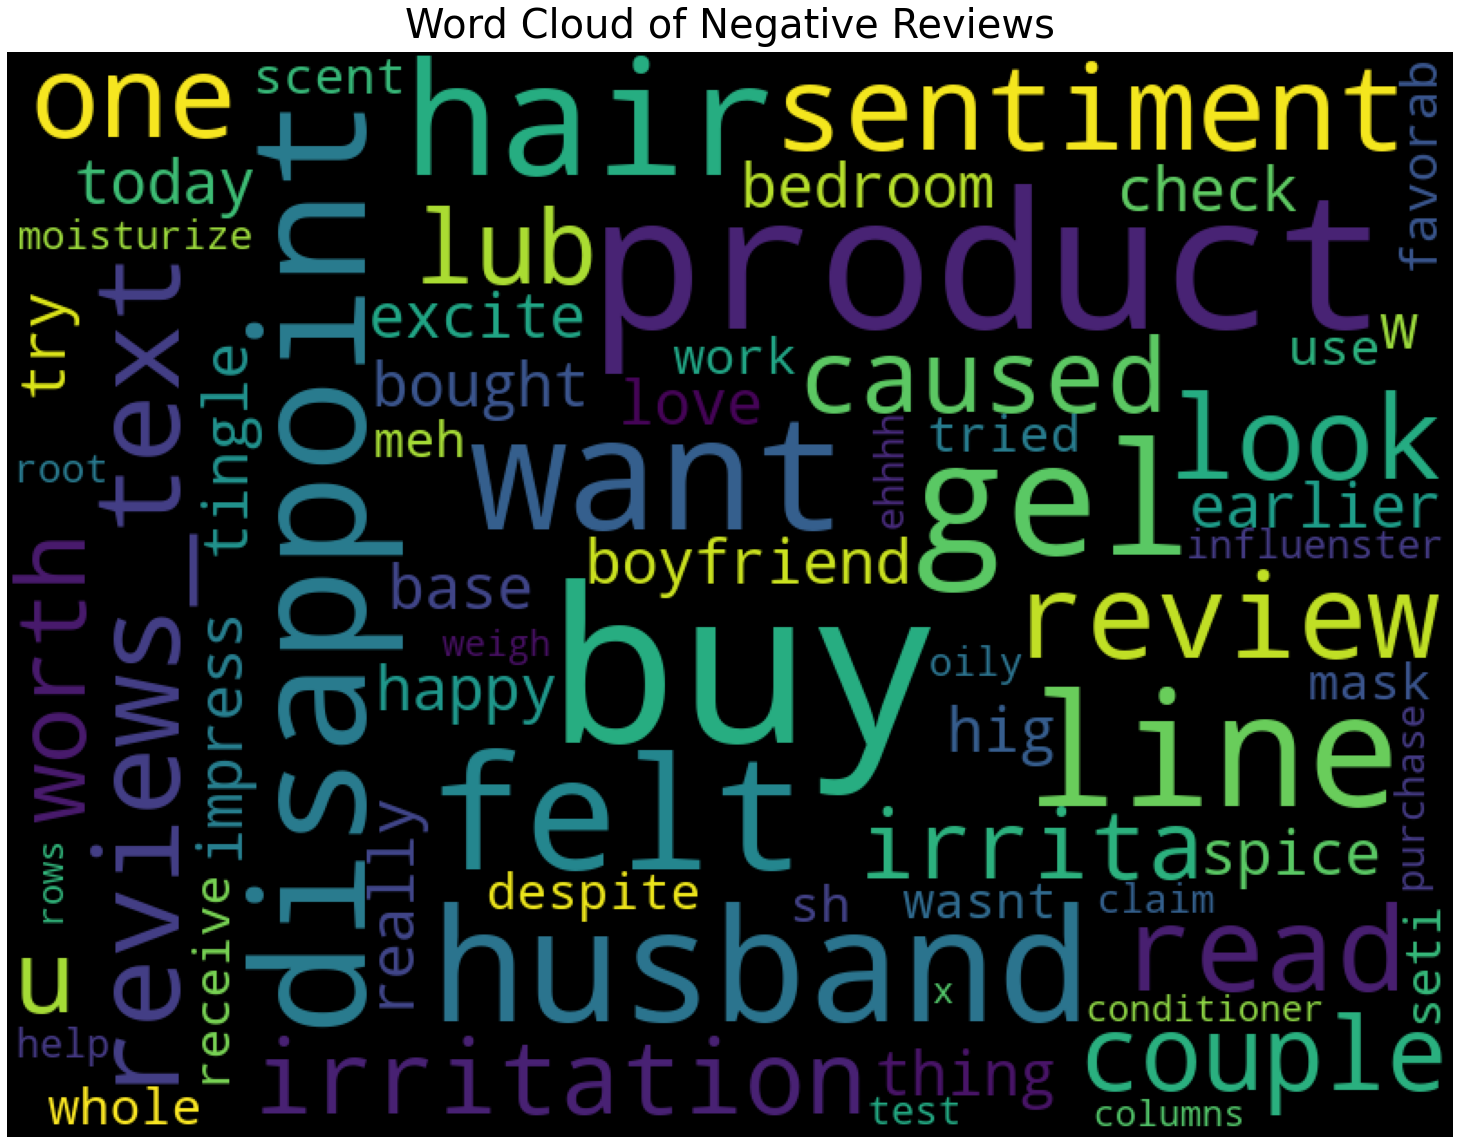

In [84]:
# to see the negative reviews wordcloud
wordcloud.generate(str(sentiment_df.loc[sentiment_df['sentiment']==0]))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

In [85]:
# adding sentiment back to review dataset
review['sentiment'] = sentiment_df['sentiment']

In [86]:
# adding the featurized reviews_text back to review dataset
review['text'] = sentiment_df['reviews_text']

In [87]:
review.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_date1,sentiment,text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,Just Awesome i love this album. it's very good...,joshua,Positive,2012-11-30,1,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good Good flavor. This review was collected as...,dorothy w,Positive,2017-07-09,1,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good Good flavor.,dorothy w,Positive,2017-07-09,1,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,Disappointed I read through the reviews on her...,rebecca,Negative,2016-01-06,0,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,Irritation My husband bought this gel for us. ...,walker557,Negative,2016-12-21,0,irritation husband buy gel u gel caused irrita...
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,1,Not worth it My boyfriend and I bought this to...,samantha,Negative,2016-04-20,0,worth boyfriend bought spice thing bedroom hig...
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,1,Disappointing Bought this earlier today and wa...,raeanne,Negative,2016-02-08,0,disappoint buy earlier today excite check base...
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,1,Not happy at all I bought this product for my ...,kimmie,Negative,2016-02-21,0,happy buy product husband try impress tingle w...
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-28T00:00:00.000Z,False,1,Very disappointing My husband and I bought thi...,cassie,Negative,2016-03-28,0,disappointing husband buy extra fun werevboth ...
9,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-03-21T00:00:00.000Z,False,1,Don't buy Got as a surprise for my husband the...,moore222,Positive,2016-03-21,0,dont buy get surprise husband nothing special ...


##### Creating pickel file for storing data and model

In [88]:
# storing tfidf vectorizer model
import pickle as pkl

pkl.dump(vectorizer, open("models/tfidf.pkl", "wb"))

In [89]:
# storing data file

pkl.dump(review, open("dataset/data.pkl", "wb"))

## Model Building
Creating the following 3 models for Sentiment Classification
1. Logistic regression
2. Random Forest
3. XG Boost Classifier 

In [90]:
# splitting data into test & train datasets to build sentiment analysis model

from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = features

# Putting response variable to y
y = sentiment_df["sentiment"]
# split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [91]:
# train and test split data info
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (24000, 16)
y_train dataset:  (24000,)
X_test dataset:  (6000, 16)
y_test dataset:  (6000,)


##### Creating a base model with Logistic Regression

In [92]:
base_classifier_LR = LogisticRegression()
base_classifier_LR.fit(X_train,y_train)

LogisticRegression()

In [93]:
y_pred_train=base_classifier_LR.predict(X_train)
y_pred=base_classifier_LR.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("Test Accuracy:", accuracy_score(y_test,y_pred))

Train Accuracy: 0.942125
[[  25  320]
 [   9 5646]]
              precision    recall  f1-score   support

           0       0.74      0.07      0.13       345
           1       0.95      1.00      0.97      5655

    accuracy                           0.95      6000
   macro avg       0.84      0.54      0.55      6000
weighted avg       0.93      0.95      0.92      6000

Test Accuracy: 0.9451666666666667


The model accuracy is 94%

### We have seen that data has high imbalance towards positiive sentiment; which needs to be handled through oversampling

In [94]:
!pip install -U imbalanced-learn

In [95]:
#using SMOTETomek to handle data imbalance
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_balanced,y_train_balanced=os.fit_resample(X_train,y_train)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [96]:
print("Before Balancing, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Balancing, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After Balancing, the shape of train_X: {}'.format(X_train_balanced.shape))
print('After Balancing, the shape of train_y: {} \n'.format(y_train_balanced.shape))
 
print("After Balancing, counts of label '1': {}".format(sum(y_train_balanced == 1)))
print("After Balancing, counts of label '0': {}".format(sum(y_train_balanced == 0)))

Before Balancing, counts of label '1': 22541
Before Balancing, counts of label '0': 1459 

After Balancing, the shape of train_X: (39404, 16)
After Balancing, the shape of train_y: (39404,) 

After Balancing, counts of label '1': 22520
After Balancing, counts of label '0': 16884


##### Training model with Logistic Regression

In [97]:
lrc = LogisticRegression()
lrc.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

In [98]:
y_pred1_train=lrc.predict(X_train_balanced)
y_pred1=lrc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train_balanced,y_pred1_train))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print("Test Accuracy:", accuracy_score(y_test,y_pred1))

Train Accuracy: 0.8017713937671302
[[ 267   78]
 [1000 4655]]
              precision    recall  f1-score   support

           0       0.21      0.77      0.33       345
           1       0.98      0.82      0.90      5655

    accuracy                           0.82      6000
   macro avg       0.60      0.80      0.61      6000
weighted avg       0.94      0.82      0.86      6000

Test Accuracy: 0.8203333333333334


LogisticRegression Classifier has accuracy of 82% 

#### Training model  with Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [100]:
y_pred2_train=rfc.predict(X_train_balanced)
y_pred2=rfc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train_balanced,y_pred2_train))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("Test Accuracy:", accuracy_score(y_test,y_pred2))

Train Accuracy: 0.8924220891280074
[[ 217  128]
 [ 726 4929]]
              precision    recall  f1-score   support

           0       0.23      0.63      0.34       345
           1       0.97      0.87      0.92      5655

    accuracy                           0.86      6000
   macro avg       0.60      0.75      0.63      6000
weighted avg       0.93      0.86      0.89      6000

Test Accuracy: 0.8576666666666667


RandomForestClassifier has accuracy of 86% 

##### Training  model wiith XGBoost

In [101]:
# importing required libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [102]:
xgbc = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic')
xgbc.fit(X_train_balanced,y_train_balanced)

[18:50:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
y_pred3_train = xgbc.predict(X_train_balanced)
predictions_train = [round(value) for value in y_pred3_train]

y_pred3 = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred3]

In [104]:
print("Test Accuracy:", accuracy_score(y_train_balanced, predictions_train))
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("Test Accuracy:", accuracy_score(y_test, predictions))

Test Accuracy: 0.8763577301796772
[[ 240  105]
 [ 783 4872]]
0.852
              precision    recall  f1-score   support

           0       0.23      0.70      0.35       345
           1       0.98      0.86      0.92      5655

    accuracy                           0.85      6000
   macro avg       0.61      0.78      0.63      6000
weighted avg       0.94      0.85      0.88      6000

Test Accuracy: 0.852


XGBoost Classifier has accuracy of 85% 

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve

def ROC_curve_plots(y_test,y_pred1, y_pred2, y_pred3, model1, model2, model3):
    fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
    auc1 = roc_auc_score(y_test, y_pred1)
    fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
    auc2 = roc_auc_score(y_test, y_pred2)
    fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
    auc3 = roc_auc_score(y_test, y_pred3) 
    plt.figure(1,figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1, tpr1, label=f'{model1} AUC={round(auc1,3)}')
    plt.plot(fpr2, tpr2, label=f'{model2} AUC={round(auc2,3)}')
    plt.plot(fpr3, tpr3, label=f'{model3} AUC={round(auc3,3)}')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return

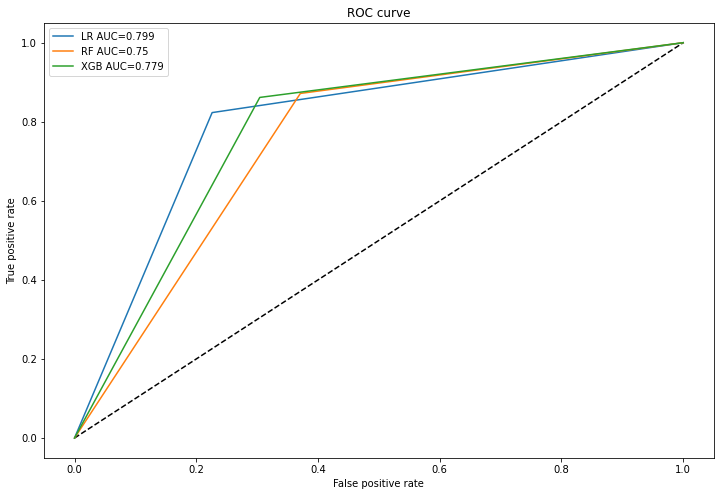

In [106]:
ROC_curve_plots(y_test,y_pred1, y_pred2,y_pred3, 'LR', 'RF','XGB')

In [107]:
# keep track of results 
df_results = pd.DataFrame(columns=["Model", 'train_balanced', 'test_balanced']) # to see all results

In [108]:
df_results = df_results.append({       # writing results to df
     "Model": 'Balanced Logreg' ,
               'train_balanced' : 0.803,
                    'test_balanced' : 0.821}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'Random Forest' ,
               'train_balanced' : 0.891,
                    'test_balanced' : 0.860}, ignore_index=True)
df_results = df_results.append({       # writing results to df
     "Model": 'XGBoost' ,
               'train_balanced' : 0.876,
                    'test_balanced' : 0.854}, ignore_index=True)

In [109]:
df_results

,Model,train_balanced,test_balanced
0,Balanced Logreg,0.803,0.821
1,Random Forest,0.891,0.860
2,XGBoost,0.876,0.854


##### RandomForest Classifier had the highest accuracy score; lets save this model in pickle file

In [110]:
# storing the models in pickle files
import sys
import pickle as pkl

In [111]:
sys.setrecursionlimit(10000)
pkl.dump(rfc, open('models/RandomForest.pkl', 'wb'))

## Building Recommendation System

For User-based recommendation system we need unique combination of product and reviewer


In [112]:
# creating new dataframe for recommendation system

df= review
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         30000 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_doRecommend  30000 non-null  object
 7   reviews_rating       30000 non-null  int64 
 8   reviews_text         30000 non-null  object
 9   reviews_username     30000 non-null  object
 10  user_sentiment       30000 non-null  object
 11  reviews_date1        29954 non-null  object
 12  sentiment            30000 non-null  int64 
 13  text                 30000 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.2+ MB


We have seen earlier that reviews_username had 63 missing values which were imputed as "Unknown"

Also, we saw a generic reviews_username "byamazon customer" with 41 review

It would be best to drop these records before proceeding

In [113]:
# Dropping records with reviews_username = "Unknown"
df = df.drop(df[(df['reviews_username'] == 'Unknown')].index)

In [114]:
# Dropping records with reviews_username = "byamazon customer"
df = df.drop(df[(df['reviews_username'] == 'byamazon customer')].index)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29896 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   29896 non-null  object
 1   brand                29896 non-null  object
 2   categories           29896 non-null  object
 3   manufacturer         29896 non-null  object
 4   name                 29896 non-null  object
 5   reviews_date         29856 non-null  object
 6   reviews_doRecommend  29896 non-null  object
 7   reviews_rating       29896 non-null  int64 
 8   reviews_text         29896 non-null  object
 9   reviews_username     29896 non-null  object
 10  user_sentiment       29896 non-null  object
 11  reviews_date1        29856 non-null  object
 12  sentiment            29896 non-null  int64 
 13  text                 29896 non-null  object
dtypes: int64(2), object(12)
memory usage: 3.4+ MB


In [116]:
# checking for duplicate record per user for the combination of id , name  and reviews_username
dup = df[df.duplicated(["id", "name", "reviews_username"])]
dup

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_date1,sentiment,text
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good Good flavor.,dorothy w,Positive,2017-07-09,1,good good flavor
12,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-08T00:00:00.000Z,False,1,waste of money Bought this to enhance our time...,jds1992,Negative,2016-04-08,0,waste money buy enhance time bit abslutely not...
44,AV1h6Gu0glJLPUi8IjA_,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-05-09T00:00:00.000Z,True,4,"2 in 1!!! Well, Johnson's need I say more I kn...",solo,Positive,2017-05-09,1,2 1 well johnson need say know right ok use jo...
79,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30T00:00:00.000Z,True,3,Why No fragrance-free Formula Today is my firs...,mylifeinheels,Positive,2016-04-30,1,fragrancefree formula today first time use pro...
90,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-04-30T03:08:38.000Z,True,3,Why No Fragrance-free Formula Today is my firs...,mylifeinheels,Positive,2016-04-30,1,fragrancefree formula today first time use pro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29807,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-30T00:00:00.000Z,True,5,Smooth and silky! I received this product from...,joycakes,Positive,2016-12-30,1,smooth silky receive product influenster excha...
29827,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-04T00:00:00.000Z,True,5,Really hydrates! This works great to make my h...,emily95,Positive,2017-01-04,1,really hydrate work great make hair shiny heal...
29841,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2016-12-29T00:00:00.000Z,True,5,Good stuff I received this product free from i...,brookieboo1994,Positive,2016-12-29,1,good stuff receive product free influenster ho...
29921,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,True,5,Smells so freaking good! This stuff is so hydr...,talmariejohn,Positive,2017-01-21,1,smell freak good stuff hydrate smell amaze eve...


There are 2310 duplicate records for the combination of id , name  and reviews_username

In [117]:
dup.reviews_username.value_counts()

mike          24
chris         19
tony           7
scott          6
thomas         6
              ..
love           1
itsme          1
pinkielj       1
honey bunz     1
filo123        1
Name: reviews_username, Length: 2115, dtype: int64

In [118]:
# checking reviews_rating count by reviews_username
dup.groupby('reviews_username')['name'].count().sort_values(ascending=False).head(20)

reviews_username
mike                 24
chris                19
tony                  7
dave                  6
scott                 6
thomas                6
movielover            6
mark                  5
matt                  5
jeff                  5
steve                 5
john                  4
josh                  4
bykindle customer     4
bobby                 4
dusty                 4
nick                  3
david                 3
jimbo                 3
alex                  3
Name: name, dtype: int64

In [119]:
dup[dup['reviews_username']=='mike'].name.value_counts()

Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd        14
Mike Dave Need Wedding Dates (dvd + Digital)                            4
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)     3
Jason Aldean - They Don't Know                                          2
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                    1
Name: name, dtype: int64

In [120]:
## Removing the duplicate records 
df.drop_duplicates(subset=["id", "name","reviews_username"],inplace=True)
df.shape

(27586, 14)

In [121]:
df[df['reviews_username']=='mike'].name.value_counts()

Meguiars Interior Detailer Wipes 25ct                                    1
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)      1
Clorox Disinfecting Bathroom Cleaner                                     1
Tostitos Simply Blue Corn Tortilla Chips                                 1
Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium    1
Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White                   1
There's Something About Mary (dvd)                                       1
Mike Dave Need Wedding Dates (dvd + Digital)                             1
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd          1
Bilbao Nightstand Gray Oak - South Shore                                 1
Jason Aldean - They Don't Know                                           1
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                1
Meguiar's Deep Crystal Car Wash 64-Oz.                                   1
100:Complete First Season

In [122]:
# creating new dataframe with reviews_username, name(product) and reviews_rating
df_cf= df[['reviews_username','name','reviews_rating']]

In [123]:
df_cf.head(10)

,reviews_username,name,reviews_rating
0,joshua,Pink Friday: Roman Reloaded Re-Up (w/dvd),5
1,dorothy w,Lundberg Organic Cinnamon Toast Rice Cakes,5
3,rebecca,K-Y Love Sensuality Pleasure Gel,1
4,walker557,K-Y Love Sensuality Pleasure Gel,1
5,samantha,K-Y Love Sensuality Pleasure Gel,1
6,raeanne,K-Y Love Sensuality Pleasure Gel,1
7,kimmie,K-Y Love Sensuality Pleasure Gel,1
8,cassie,K-Y Love Sensuality Pleasure Gel,1
9,moore222,K-Y Love Sensuality Pleasure Gel,1
10,jds1992,K-Y Love Sensuality Pleasure Gel,1


##### Splitting data into train and test sets fror modeling

In [124]:
# Test and Train split of the dataset

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cf, test_size=0.30, random_state=31)

In [125]:
print(train.shape)
print(test.shape)

(19310, 3)
(8276, 3)


In [126]:
# creating a Pivot table of reviews_username vs name(products) with reviews_rating
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Duplicating train &  test dataset as dummy train and test for use in prediction.

The purpose is to avoid recommending those products to users which they have already rated

Product rated will be marked as 0 during. 
Product not rated will be marked as 1.

Dummy test will be used for evaluation, only recommending the products rated by the user

In [127]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [128]:
# converting the values to mark user who rated products to 0 and 1 for all other
dummy_train['rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [129]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='rating'
).fillna(1)

In [130]:
dummy_train.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.11E+24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two vectors

#### Adjusted Cosine 

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

##### User Similarity Matrix  using Cosine Similarity

In [131]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.

user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [132]:
user_correlation.shape

(17853, 17853)

##### Applying adjusted Cosine by calculating  mean only for only for the products rated by the user

In [133]:
# Creatinh a user-product matrix

df_pivot_sub = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [134]:
df_pivot_sub.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# checking sample records
df[df['reviews_username']=='08dallas']

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_date1,sentiment,text
5467,AVpf0thK1cnluZ0-r8vR,Warner Bros.,"Movies, Music & Books,Movies,New Movie Release...",Warner Home Video,100:Complete First Season (blu-Ray),2015-07-26T00:00:00.000Z,True,5,My picky boy likes it! My picky adult boy like...,08dallas,Positive,2015-07-26,1,picky boy like picky adult boy likes series mu...


In [136]:
### Normalising the rating of the products for each user around 0 mean

mean = np.nanmean(df_pivot_sub, axis=1)
df_norm = (df_pivot_sub.T-mean).T

In [137]:
mean

array([4., 1., 5., ..., 2., 5., 4.])

In [138]:
df_norm.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09mommy11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Finding User Similarity Matrix

In [139]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_norm.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##### User User - Prediction

Objective is to predict for users who are positively related, therefore ignoring any correlation for values less than 0.

In [140]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
df_pivot.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# creating user user prediction matriix using dot product of user-user correlation and user-product

user_predicted_ratings = np.dot(user_correlation, df_pivot)
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [143]:
user_predicted_ratings.shape

(17853, 254)

In [144]:
# getting final ratings usiing predicted and dummy train

user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Finding the top 5 recommendation for the *user*

In [145]:
# getting user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name123soccermom
123soccermom


In [146]:
user_final_rating.head(20)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
# Finding the top 50 recommendation for the user_input using final_rating

user_final_rating.loc[user_input].sort_values(ascending=False)[0:50]

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                          0.0
Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201         0.0
Olay Regenerist Deep Hydration Regenerating Cream                                      0.0
Olivella Bar Soap - 3.52 Oz                                                            0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                                   0.0
Pantene Color Preserve Volume Shampoo, 25.4oz                                          0.0
Pantene Pro-V Expert Collection Age Defy Conditioner                                   0.0
Pearhead Id Bracelet Frame                                                             0.0
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack        0.0
Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural    0.0
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl             

In [148]:
# Filtering top 5 recommendations
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                     0.0
Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201    0.0
Olay Regenerist Deep Hydration Regenerating Cream                                 0.0
Olivella Bar Soap - 3.52 Oz                                                       0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                              0.0
Name: 123soccermom, dtype: float64

#### Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [149]:
# Find out the common users of test and train dataset

common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1046, 3)

In [150]:
common.head(20)

,reviews_username,name,reviews_rating
4245,teresa,Hoover174 Platinum Collection153 Lightweight B...,5
19997,motherof3,Clorox Disinfecting Bathroom Cleaner,5
19883,sctrish,Clorox Disinfecting Bathroom Cleaner,5
26308,jayjay,Stargate (ws) (ultimate Edition) (director's C...,4
6284,meme,"Hormel Chili, No Beans",3
15580,nana,D-Con Mice Bait Station - 3ct,5
22413,brittany,Clear Scalp & Hair Therapy Total Care Nourishi...,1
2340,movieperson825,Mike Dave Need Wedding Dates (dvd + Digital),5
18462,laura,"Batherapy Natural Mineral Bath Sport Liquid, 1...",5
21238,pammy,Nexxus Exxtra Gel Style Creation Sculptor,1


In [151]:
# convert data into the user-product matrix
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [152]:
common_user_based_matrix.shape

(871, 120)

In [153]:
common_user_based_matrix

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yeyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yohnie1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [155]:
df_norm.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
user_correlation_df['reviews_username'] = df_norm.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17843,17844,17845,17846,17847,17848,17849,17850,17851,17852
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
common.head(10)

,reviews_username,name,reviews_rating
4245,teresa,Hoover174 Platinum Collection153 Lightweight B...,5
19997,motherof3,Clorox Disinfecting Bathroom Cleaner,5
19883,sctrish,Clorox Disinfecting Bathroom Cleaner,5
26308,jayjay,Stargate (ws) (ultimate Edition) (director's C...,4
6284,meme,"Hormel Chili, No Beans",3
15580,nana,D-Con Mice Bait Station - 3ct,5
22413,brittany,Clear Scalp & Hair Therapy Total Care Nourishi...,1
2340,movieperson825,Mike Dave Need Wedding Dates (dvd + Digital),5
18462,laura,"Batherapy Natural Mineral Bath Sport Liquid, 1...",5
21238,pammy,Nexxus Exxtra Gel Style Creation Sculptor,1


In [158]:
user_correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17853 entries, 00dog3 to zzz1127
Columns: 17853 entries, 0 to 17852
dtypes: float64(17853)
memory usage: 2.4+ GB


In [159]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17853 entries, 00dog3 to zzz1127
Columns: 254 entries, 0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest to Yes To Grapefruit Rejuvenating Body Wash
dtypes: float64(254)
memory usage: 34.7+ MB


In [160]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_norm.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [161]:
user_correlation_df_1.shape

(871, 17853)

In [162]:
user_correlation_df_1.head()

,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [164]:
user_correlation_df_2

reviews_username,00sab00,1234,123charlie,1943,37f5p,aaron,abby,abismomy,adam,adriana9999,...,wiseman378,wizard,wolverine,wonster67,woody,yeyo,yohnie1,yummy,zippy,zitro
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yeyo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yohnie1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zippy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
user_correlation_df_3 = user_correlation_df_2[1:].T

In [166]:
user_correlation_df_3.head()

,1234,123charlie,1943,37f5p,aaron,abby,abismomy,adam,adriana9999,aep1010,...,wiseman378,wizard,wolverine,wonster67,woody,yeyo,yohnie1,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
user_correlation_df_3.shape

(871, 870)

In [168]:
user_correlation_df_3[user_correlation_df_3<0]

,1234,123charlie,1943,37f5p,aaron,abby,abismomy,adam,adriana9999,aep1010,...,wiseman378,wizard,wolverine,wonster67,woody,yeyo,yohnie1,yummy,zippy,zitro
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37f5p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yeyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yohnie1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix[1:].fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [170]:
common_user_based_matrix.shape

(871, 120)

In [171]:
common.head()

,reviews_username,name,reviews_rating
4245,teresa,Hoover174 Platinum Collection153 Lightweight B...,5
19997,motherof3,Clorox Disinfecting Bathroom Cleaner,5
19883,sctrish,Clorox Disinfecting Bathroom Cleaner,5
26308,jayjay,Stargate (ws) (ultimate Edition) (director's C...,4
6284,meme,"Hormel Chili, No Beans",3


In [172]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [173]:
dummy_test.shape

(871, 120)

In [174]:
dummy_test.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
common_user_predicted_ratings.shape

(871, 120)

In [176]:
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [177]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [178]:
common_user_predicted_ratings.head(20)

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abismomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
adam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [179]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [180]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [181]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [182]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.4413272616534543


In [183]:
common.head()

,reviews_username,name,reviews_rating
4245,teresa,Hoover174 Platinum Collection153 Lightweight B...,5
19997,motherof3,Clorox Disinfecting Bathroom Cleaner,5
19883,sctrish,Clorox Disinfecting Bathroom Cleaner,5
26308,jayjay,Stargate (ws) (ultimate Edition) (director's C...,4
6284,meme,"Hormel Chili, No Beans",3


In [184]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [185]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [186]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.4413272616534543


# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [187]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
mean = np.nanmean(df_pivot, axis=1)
df_norm = (df_pivot.T-mean).T

In [189]:
df_norm.head()

reviews_username,00dog3,00sab00,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zotox,zout22389,zsarah,zsazsa,zulaa118,zwithanx,zxcsdfd,zxjki,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,0.298969,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [190]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_norm.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [191]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [192]:
## Prediction - Item Item

In [193]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01928584, 0.        ,
        0.        ],
       [0.        , 0.01703714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09833277, 0.        , ..., 0.00232272, 0.00356381,
        0.01854675],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00012819, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01333037,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00025637, 0.        ,
        0.        ]])

In [194]:
item_predicted_ratings.shape

(17853, 254)

In [195]:
dummy_train.shape

(17853, 254)

## Filtering the rating only for the movies not rated by the user for recommendation

In [196]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.098333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002323,0.003564,0.018547
02deuce,0.0,0.078666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001858,0.002851,0.014837
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000


Finding the top 5 recommendation for the user

In [197]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name123soccermom
123soccermom


In [198]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20].index
d

Index(['Clorox Disinfecting Bathroom Cleaner',
       'L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz',
       'Newman's Own Organics Licorice Twist, Black 5oz',
       'Nature's Path Chunky Chocolate Peanut Chewy Granola Bars',
       'Mill Creek Aloe Vera & Paba Lotion',
       'My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Nexxus Exxtra Gel Style Creation Sculptor',
       'Chex Muddy Buddies Brownie Supreme Snack Mix',
       'L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty',
       'SC Johnson One Step No Buff Wax', 'Red (special Edition) (dvdvideo)',
       'CeraVe SA Renewing Cream', 'The Honest Company Laundry Detergent',
       'Tresemme Kertatin Smooth Infusing Conditioning',
       'Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack',
       'Meguiar's Deep Crystal Car Wash 64-Oz.',
       'Orajel Maximum Strength

In [199]:
d.to_frame(index=False)

,name
0,Clorox Disinfecting Bathroom Cleaner
1,L'or233al Paris Elvive Extraordinary Clay Reba...
2,"Newman's Own Organics Licorice Twist, Black 5oz"
3,Nature's Path Chunky Chocolate Peanut Chewy Gr...
4,Mill Creek Aloe Vera & Paba Lotion
5,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
6,Planes: Fire Rescue (2 Discs) (includes Digita...
7,Nexxus Exxtra Gel Style Creation Sculptor
8,Chex Muddy Buddies Brownie Supreme Snack Mix
9,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...


In [200]:
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.098333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002323,0.003564,0.018547
02deuce,0.0,0.078666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001858,0.002851,0.014837
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
zxcsdfd,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
zxjki,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000128,0.000000,0.000000


### Evaluation - Item Item
Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the movie already rated by the user insead of predicting it for the movie not rated by the user.

In [201]:
test.columns

Index(['reviews_username', 'name', 'reviews_rating'], dtype='object')

In [202]:
common =  test[test.name.isin(train.name)]
common.shape

(8255, 3)

In [203]:
common.head(4)

,reviews_username,name,reviews_rating
23856,ericv2,Godzilla 3d Includes Digital Copy Ultraviolet ...,4
27258,gabe,Planes: Fire Rescue (2 Discs) (includes Digita...,3
7965,adash75,Clorox Disinfecting Wipes Value Pack Scented 1...,5
4245,teresa,Hoover174 Platinum Collection153 Lightweight B...,5


In [204]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [205]:
common_item_based_matrix.shape

(197, 7913)

In [206]:
item_correlation_df = pd.DataFrame(item_correlation)

In [207]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
item_correlation_df['name'] = df_norm.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
list_name = common.name.tolist()

In [210]:
item_correlation_df.columns = df_norm.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [211]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [212]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.02731043, 0.        ,
        0.        ],
       [0.        , 0.05899966, 0.        , ..., 0.        , 0.03266576,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00139363, 0.        , ..., 0.        , 0.        ,
        0.00032046],
       [0.00799822, 0.00213828, 0.        , ..., 0.00448153, 0.        ,
        0.        ],
       [0.        , 0.01112805, 0.        , ..., 0.01227513, 0.        ,
        0.        ]])

In [214]:
common_item_predicted_ratings.shape

(197, 7913)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the product rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [215]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [216]:
dummy_test

reviews_username,00sab00,01impala,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234asdf,123charlie,123rs,13ld,...,zombiedad80,zookeeper,zoso60,zowie,zozo0o,zpalma,zt313,zubb,zuttle,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [217]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [218]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [219]:
common_

reviews_username,00sab00,01impala,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234asdf,123charlie,123rs,13ld,...,zombiedad80,zookeeper,zoso60,zowie,zozo0o,zpalma,zt313,zubb,zuttle,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weleda Everon Lip Balm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [221]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.580281661196735


In [222]:
###  Create a pickle file

import pickle as pkl

item_final_rating.to_pickle("models/item_recommendation.pkl")


### Testing

In [223]:
import sys
import pickle as pkl

In [224]:
data = pkl.load(open('dataset/data.pkl','rb'))

In [225]:
model_rec= pkl.load(open('models/item_recommendation.pkl','rb'))

In [226]:
model_rec

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019286,0.000000,0.000000
00sab00,0.0,0.017037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.098333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002323,0.003564,0.018547
02deuce,0.0,0.078666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001858,0.002851,0.014837
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwithanx,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
zxcsdfd,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000320,0.000000,0.000000
zxjki,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000128,0.000000,0.000000


In [227]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user name123soccermom
123soccermom


In [228]:
d = model_rec.loc[user_input].sort_values(ascending=False)[0:5].index
d

Index(['Clorox Disinfecting Bathroom Cleaner',
       'L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz',
       'Newman's Own Organics Licorice Twist, Black 5oz',
       'Nature's Path Chunky Chocolate Peanut Chewy Granola Bars',
       'Mill Creek Aloe Vera & Paba Lotion'],
      dtype='object', name='name')

In [229]:
df_pred = data[data.name.isin(d)]

In [230]:
df_pred

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_date1,sentiment,text
4100,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2016-04-28T00:00:00Z,False,2,nan Too soft. I had to leave it out to get it ...,karen,Negative,2016-04-28,0,nan soft leave get bit stale could eat
4101,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2014-02-22T00:00:00Z,False,2,nan unfortunately i didn't like these a lot......,deb,Negative,2014-02-22,0,nan unfortunately didnt like lotstill prefer p...
4102,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2017-07-12T00:00:00.000Z,True,3,Not very much licorice flavor More like a swee...,robert b,Positive,2017-07-12,1,much licorice flavor like sweet black jelly be...
4103,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2013-11-12T00:00:00Z,True,3,nan Just ok. Not as good as others,brooke,Positive,2013-11-12,1,nan ok good others
4104,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2012-10-29T00:00:00Z,True,5,"nan tasted great, but then everything by Newma...",linda,Positive,2012-10-29,1,nan taste great everything newman great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,True,5,Softness!! I got this conditioner with Influen...,laurasnchz,Positive,2017-01-23,1,softness get conditioner influenster try im lo...
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,True,5,"I love it I love it , I received this for revi...",scarlepadilla,Positive,2017-01-27,1,love love receive review purpose influenster l...
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,True,5,Hair is so smooth after use First of all I lov...,liviasuexo,Positive,2017-01-21,1,hair smooth use first love smell product wash ...
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,True,5,Perfect for my oily hair! I received this thro...,ktreed95,Positive,2017-01-11,1,perfect oily hair receive influenster never go...


In [231]:
tfidf = pkl.load(open('models/tfidf.pkl','rb'))

In [232]:
df_pred['text']

4100                nan soft leave get bit stale could eat
4101     nan unfortunately didnt like lotstill prefer p...
4102     much licorice flavor like sweet black jelly be...
4103                                    nan ok good others
4104               nan taste great everything newman great
                               ...                        
29995    softness get conditioner influenster try im lo...
29996    love love receive review purpose influenster l...
29997    hair smooth use first love smell product wash ...
29998    perfect oily hair receive influenster never go...
29999    condition healthy receive product complimentar...
Name: text, Length: 3243, dtype: object

In [233]:
features_pred = vectorizer.transform(df_pred['text'])
features_pred

<3243x16 sparse matrix of type '<class 'numpy.float64'>'
	with 16153 stored elements in Compressed Sparse Row format>

In [234]:
rfc = pkl.load(open('models/RandomForest.pkl', 'rb'))

In [235]:
pred_data = rfc.predict(features_pred)
predictions = [round(value) for value in pred_data]

In [236]:
len(predictions)

3243

In [237]:
df_pred['predicted'] = predictions

<ipython-input-237-fb5bcbc31db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predicted'] = predictions


In [238]:
df_pred

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_username,user_sentiment,reviews_date1,sentiment,text,predicted
4100,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2016-04-28T00:00:00Z,False,2,nan Too soft. I had to leave it out to get it ...,karen,Negative,2016-04-28,0,nan soft leave get bit stale could eat,0
4101,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2014-02-22T00:00:00Z,False,2,nan unfortunately i didn't like these a lot......,deb,Negative,2014-02-22,0,nan unfortunately didnt like lotstill prefer p...,0
4102,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2017-07-12T00:00:00.000Z,True,3,Not very much licorice flavor More like a swee...,robert b,Positive,2017-07-12,1,much licorice flavor like sweet black jelly be...,0
4103,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2013-11-12T00:00:00Z,True,3,nan Just ok. Not as good as others,brooke,Positive,2013-11-12,1,nan ok good others,1
4104,AVpe8q4T1cnluZ0-afct,Newman's Own Organics,"Food,Packaged Foods,Candy,Soft Candy,Candy & G...",Newman's Own,"Newman's Own Organics Licorice Twist, Black 5oz",2012-10-29T00:00:00Z,True,5,"nan tasted great, but then everything by Newma...",linda,Positive,2012-10-29,1,nan taste great everything newman great,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,True,5,Softness!! I got this conditioner with Influen...,laurasnchz,Positive,2017-01-23,1,softness get conditioner influenster try im lo...,1
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,True,5,"I love it I love it , I received this for revi...",scarlepadilla,Positive,2017-01-27,1,love love receive review purpose influenster l...,1
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,True,5,Hair is so smooth after use First of all I lov...,liviasuexo,Positive,2017-01-21,1,hair smooth use first love smell product wash ...,1
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,True,5,Perfect for my oily hair! I received this thro...,ktreed95,Positive,2017-01-11,1,perfect oily hair receive influenster never go...,1


In [239]:
df_pred[df_pred['predicted']==1][['name', 'brand']].drop_duplicates()[:5].reset_index(drop=True)

,name,brand
0,"Newman's Own Organics Licorice Twist, Black 5oz",Newman's Own Organics
1,Mill Creek Aloe Vera & Paba Lotion,Mill Creek
2,Clorox Disinfecting Bathroom Cleaner,Clorox
3,L'or233al Paris Elvive Extraordinary Clay Reba...,L'oreal Paris
